In [1]:
import geopandas

In [6]:
import geopandas as gpd
import pandas as pd




In [7]:
# Read the earthquake data file into a Pandas DataFrame
earthquake_data = pd.read_csv('earthquake_data.csv')

In [8]:
# Create a GeoDataFrame from the DataFrame with Point geometries
geometry = gpd.points_from_xy(earthquake_data.longitude, earthquake_data.latitude)
gdf = gpd.GeoDataFrame(earthquake_data, geometry=geometry)


In [9]:
print(gdf.columns)


Index(['time', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'nst',
       'gap', 'dmin', 'rms', 'net', 'id', 'updated', 'place', 'type',
       'horizontalError', 'depthError', 'magError', 'magNst', 'status',
       'locationSource', 'magSource', 'geometry'],
      dtype='object')


In [10]:
# Check data types
print(gdf.dtypes)

time                 object
latitude            float64
longitude           float64
depth               float64
mag                 float64
magType              object
nst                 float64
gap                 float64
dmin                float64
rms                 float64
net                  object
id                   object
updated              object
place                object
type                 object
horizontalError     float64
depthError          float64
magError            float64
magNst              float64
status               object
locationSource       object
magSource            object
geometry           geometry
dtype: object


In [11]:
# Check missing values
print(gdf.isnull().sum())

time                0
latitude            0
longitude           0
depth               0
mag                 0
magType             0
nst                17
gap                17
dmin               18
rms                 0
net                 0
id                  0
updated             0
place               2
type                0
horizontalError    17
depthError          1
magError           17
magNst             17
status              0
locationSource      0
magSource           0
geometry            0
dtype: int64


In [12]:
# Descriptive statistics
print(gdf.describe())

        latitude   longitude       depth        mag        nst         gap  \
count  26.000000   26.000000   26.000000  26.000000   9.000000    9.000000   
mean   52.101617 -140.218104   34.401538   2.779615  61.555556   58.288411   
std    13.825440   16.697624   42.131144   0.295736  22.661151   57.659757   
min    19.334999 -166.557700    0.000000   2.500000  22.000000   15.000000   
25%    38.767709 -151.066750    2.707500   2.537500  49.000000   25.000000   
50%    59.931850 -147.901100   12.150000   2.665000  64.000000   36.000000   
75%    61.299700 -122.802874   59.500000   2.992500  65.000000   61.595703   
max    69.593000  -98.035400  133.200000   3.400000  97.000000  188.000000   

           dmin        rms  horizontalError  depthError  magError     magNst  
count  8.000000  26.000000         9.000000   25.000000  9.000000   9.000000  
mean   0.059037   0.412820         0.457720    2.146000  0.414556  32.555556  
std    0.095741   0.264098         0.580343    7.417197  0.5

In [13]:
import matplotlib.pyplot as plt

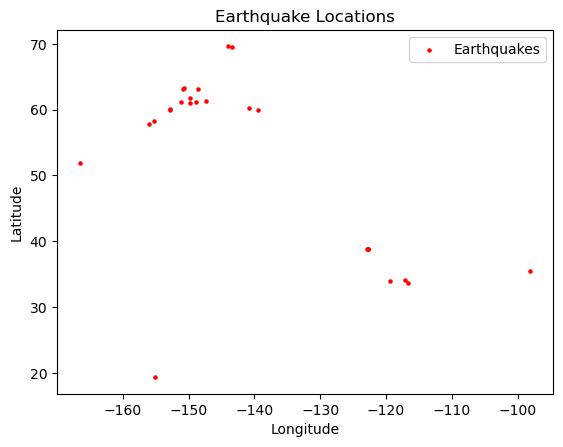

In [18]:
# Create a basic plot of the earthquake locations
gdf.plot(marker='o', color='red', markersize=5)

# Customize the plot
plt.title('Earthquake Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(['Earthquakes'])


# Show the plot
plt.show()

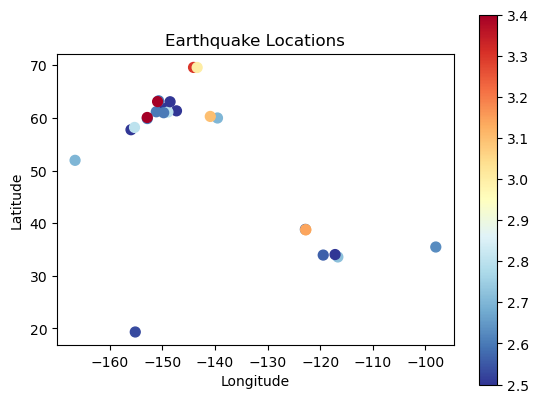

In [20]:
# Create a basic plot of the earthquake locations with color-coded markers by magnitude
gdf.plot(marker='o', column='mag', cmap='RdYlBu_r', markersize=50, legend=True)

# Customize the plot
plt.title('Earthquake Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show the plot
plt.show()

In [21]:
# Analyze seismic activity by regions
region_data = gdf.groupby('place').agg({'mag': ['count', 'mean']})

# Sort regions by earthquake count in descending order
region_data = region_data.sort_values(('mag', 'count'), ascending=False)

# Print the top regions with the highest earthquake count
print("Regions with the highest earthquake count:")
print(region_data.head())

# Buffer around earthquake locations to identify prone areas
buffered_earthquakes = gdf.geometry.buffer(distance=0.1)  # Buffer distance of 0.1 (adjust as needed)

# Spatially join earthquakes with the buffered areas
earthquakes_prone_areas = gpd.sjoin(gdf, gpd.GeoDataFrame(geometry=buffered_earthquakes), how='inner')

# Print the total number of earthquakes in prone areas
print("Total number of earthquakes in prone areas:", len(earthquakes_prone_areas))

Regions with the highest earthquake count:
                                mag       
                              count   mean
place                                     
4km SSE of The Geysers, CA        2  3.115
6km NW of The Geysers, CA         2  2.750
103 km NW of Yakutat, Alaska      1  3.100
62 km SSW of Kaktovik, Alaska     1  3.300
Southeastern Alaska               1  2.700
Total number of earthquakes in prone areas: 38


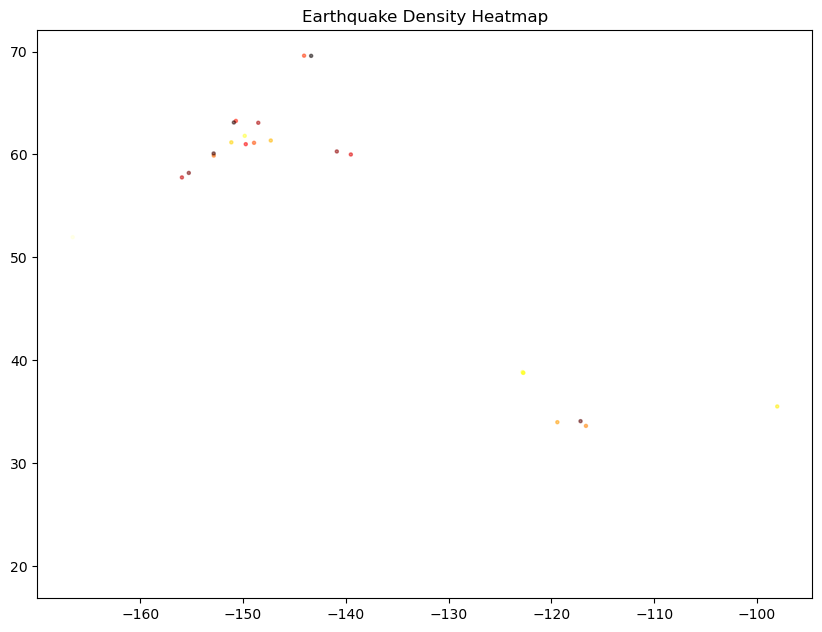

In [24]:
# Create a heatmap based on earthquake density
fig, ax = plt.subplots(figsize=(10, 8))
gdf.plot(ax=ax, markersize=5, alpha=0.5, cmap='hot_r', scheme='quantiles', legend=True, column=None)
ax.set_title('Earthquake Density Heatmap')
plt.show()

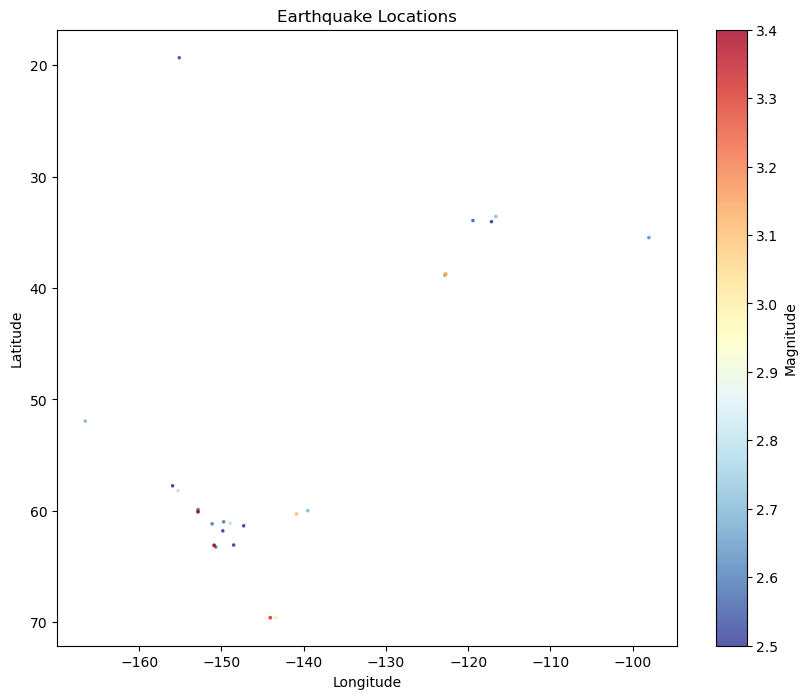

In [30]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Read the earthquake data CSV file into a DataFrame
earthquake_data = pd.read_csv('earthquake_data.csv')

# Create a GeoDataFrame with Point geometries based on latitude and longitude
geometry = gpd.points_from_xy(earthquake_data['longitude'], earthquake_data['latitude'])
gdf = gpd.GeoDataFrame(earthquake_data, geometry=geometry)

# Set up the plot
fig, ax = plt.subplots(figsize=(10, 8))

# Color-code the markers by earthquake magnitude
sc = ax.scatter(gdf['longitude'], gdf['latitude'], c=gdf['mag'], cmap='RdYlBu_r', s=gdf['mag'], alpha=0.8)

# Customize the plot
ax.set_title('Earthquake Locations')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Adjust the point size
ax.set_ylim(ax.get_ylim()[::-1])  # Reverse the y-axis to match latitude convention
ax.set_xlim(ax.get_xlim())  # Adjust the x-axis limits if needed

# Create a colorbar legend from the scatter plot
cbar = plt.colorbar(sc, ax=ax)
cbar.set_label('Magnitude')

# Show the plot
plt.show()
